In [67]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import os
import glob
import ast
import matplotlib

import numpy as np
from scipy.optimize import curve_fit

In [68]:
def sine_function(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

In [69]:
# measurements folder path
folder_path = "measurements\\measurements_after_HWP_fm2\\"
folder_path = "measurements/measurements_after_HWP_fm2/"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))


In [70]:
# before hwp folder path
folder_path = "analog_data/before_hwp/"
analog_files =  glob.glob(os.path.join(folder_path, "*.csv"))
analog_files

['analog_data/before_hwp/powers_fm2_rf_90.csv',
 'analog_data/before_hwp/powers_fm2_rf_85.csv',
 'analog_data/before_hwp/powers_fm2_rf_50.csv',
 'analog_data/before_hwp/powers_fm2_rf_78.csv',
 'analog_data/before_hwp/powers_fm2_rf_45.csv',
 'analog_data/before_hwp/powers_fm2_rf_92.csv',
 'analog_data/before_hwp/powers_fm2_rf_8.csv',
 'analog_data/before_hwp/powers_fm2_rf_96.csv',
 'analog_data/before_hwp/powers_fm2_rf_55.csv',
 'analog_data/before_hwp/powers_fm2_rf_40.csv',
 'analog_data/before_hwp/powers_fm2_rf_83.csv',
 'analog_data/before_hwp/powers_fm2_rf_9.csv',
 'analog_data/before_hwp/powers_fm2_rf_80.csv',
 'analog_data/before_hwp/powers_fm2_rf_94.csv',
 'analog_data/before_hwp/powers_fm2_rf_30.csv',
 'analog_data/before_hwp/powers_fm2_rf_25.csv',
 'analog_data/before_hwp/powers_fm2_rf_35.csv',
 'analog_data/before_hwp/powers_fm2_rf_20.csv',
 'analog_data/before_hwp/powers_fm2_rf_01.csv',
 'analog_data/before_hwp/powers_fm2_rf_15.csv',
 'analog_data/before_hwp/powers_fm2_rf_100

In [72]:
#read in darkcounts
darkcounts = pd.read_csv(csv_files[22])
csv_files.pop(22)
# darkcounts_before = pd.read_csv(analog_files[0], skiprows=2)


'measurements/measurements_after_HWP_fm2/measured_darkcount.csv'

In [73]:
# save all for all measured rfs the loaded df into a list
all_rf = [pd.read_csv(file) for file in csv_files[1:]]
all_before = [pd.read_csv(file, skiprows=2) for file in analog_files]


In [74]:
#initiate dicts for saving before avgs
all_before_dict = {}
all_before_avg = {}

In [75]:
for i, data in enumerate(all_before):
    rf = os.path.basename(analog_files[i]).split('rf_')[1][0:3]
    # rf = os.path.basename(analog_files[i+1]).split('rf_')
    rf = rf.split('.')[0]
    label = f'rf{rf}'
    print(i, label)
    all_before_dict[label] = data
    all_before_avg[label] = np.average(all_before_dict[label][' Measurement'])



0 rf90
1 rf85
2 rf50
3 rf78
4 rf45
5 rf92
6 rf8
7 rf96
8 rf55
9 rf40
10 rf83
11 rf9
12 rf80
13 rf94
14 rf30
15 rf25
16 rf35
17 rf20
18 rf01
19 rf15
20 rf100
21 rf7
22 rf98
23 rf6
24 rf4
25 rf65
26 rf70
27 rf5
28 rf60
29 rf75
30 rf2
31 rf88
32 rf3


In [76]:
n_lines = len(all_before_avg)
cmap = matplotlib.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

In [84]:
# # chanigning keys for before hwp so theyre consistent
# keys = all_before_avg.keys()
# print(keys)
# for key in keys:
#     if len(key) == 3:
#         newkey = 'rf0' + key.split('rf')[1]
#         all_before_avg[newkey] = all_before_avg.pop(key)

dict_keys(['rf90', 'rf85', 'rf50', 'rf78', 'rf45', 'rf92', 'rf96', 'rf55', 'rf40', 'rf83', 'rf80', 'rf94', 'rf30', 'rf25', 'rf35', 'rf20', 'rf01', 'rf15', 'rf100', 'rf98', 'rf65', 'rf70', 'rf60', 'rf75', 'rf88', 'rf08', 'rf09', 'rf07', 'rf06', 'rf04', 'rf05', 'rf02', 'rf03'])


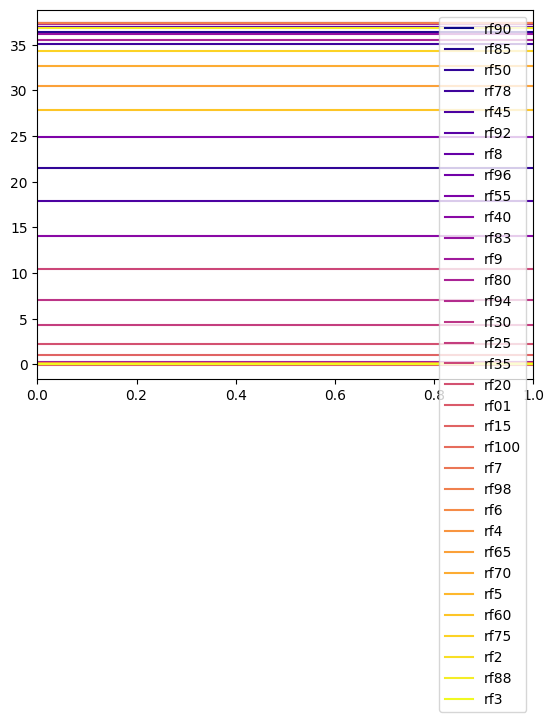

In [78]:
for i, (rf, avg) in enumerate(all_before_avg.items()):
    # print(rf, avg)
    plt.axhline(avg, label=rf, color = colors[i])
    plt.legend()

Text(0, 0.5, 'Power before HWP [W]')

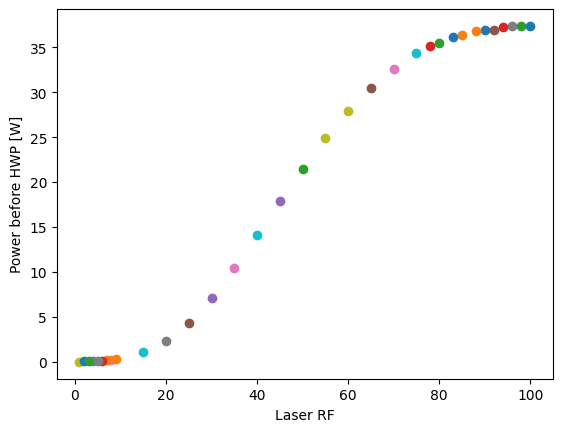

In [79]:
for i, (rf, avg) in enumerate(all_before_avg.items()):
    # print(rf, avg)
    # plt.axhline(avg, label=rf, color = colors[i])
    # plt.legend()
    plt.scatter(int(rf[2:]), avg)
plt.xlabel('Laser RF')
plt.ylabel('Power before HWP [W]')

3 rf90
hello ! | 


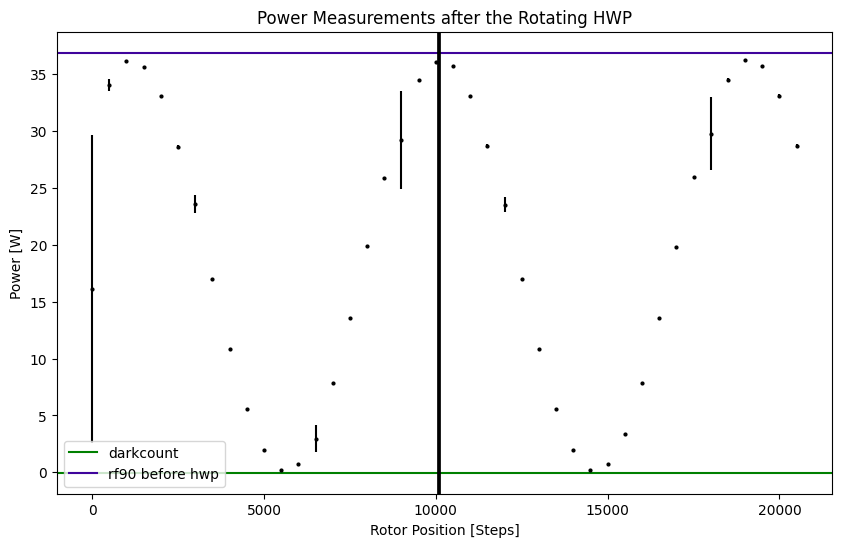

In [97]:
# plot all rfs tgt

fig, ax = plt.subplots(1,1, figsize =  (10,6))
ax.set_title('Power Measurements after the Rotating HWP')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Rotor Position [Steps]')

#darkcount line
ax.axhline(np.average(darkcounts['averaged']), color = 'green', label = 'darkcount')
#before hwp average

for i, data in enumerate(all_rf):
    x = np.zeros(len(data['rotor_step']), dtype=float)
    for j,step in enumerate(data['rotor_step']):
        lst = ast.literal_eval(step)
        array = np.array(lst, dtype=float)
        x[j] = array[0]
    rf = os.path.basename(csv_files[i+1]).split('rf')[1]
    # rf = os.path.basename(csv_files[i+1]).split('rf')[1]
    if (not '100' in rf):
        rf = rf[0:2]
        label = f'rf{rf}'
    else:
        rf = rf[0:3]
        label = f'rf{rf}'

    # if 'N48' in os.path.basename(csv_files[i+1]) or '03' in os.path.basename(csv_files[i+1]):
    # if (rf == '15') or (rf=='10'):
    # if label == 'rf07' or label == 'rf06' or label == 'rf05'  :
    if label == 'rf90'  :
        

        print(i, label)
        print('hello ! | ')
        y = data['averaged']
        error = np.array(data['stdev'])

        # params, params_covariance = curve_fit(sine_function, x[3:], y[3:], p0 = [0.0361029908,0.0998, 3.87, 0.0046])
        # plt.plot(x, sine_function(x, *params), label='Fitted Sine Function', color='red')
        # print(i, "Fitted Parameters: A = {}, B = {}, C = {}, D = {}".format(*params))
        try:
            ax.axhline(all_before_avg[label], color = colors[i], label = f'{label} before hwp')
        except KeyError:
            print(f'{label} isnt measured at before hwp')
        # ax.scatter(x, y, label=label, marker='x')
        # ax.plot(x, y, label=label, color = colors[i])
        ax.errorbar(x = x, y = y, yerr=error, fmt='o', color = 'black', markersize = 2)
        # ax.errorbar(x = x, y = y, yerr=error, fmt='x', color = 'black', markersize = 1)
    ax.axvline(10000+100, color = 'black')
    

    # ax.set_ylim( -0.04, 0)

ax.legend()

21 rf09
hello ! | 
24 rf07
hello ! | 
25 rf06
hello ! | 


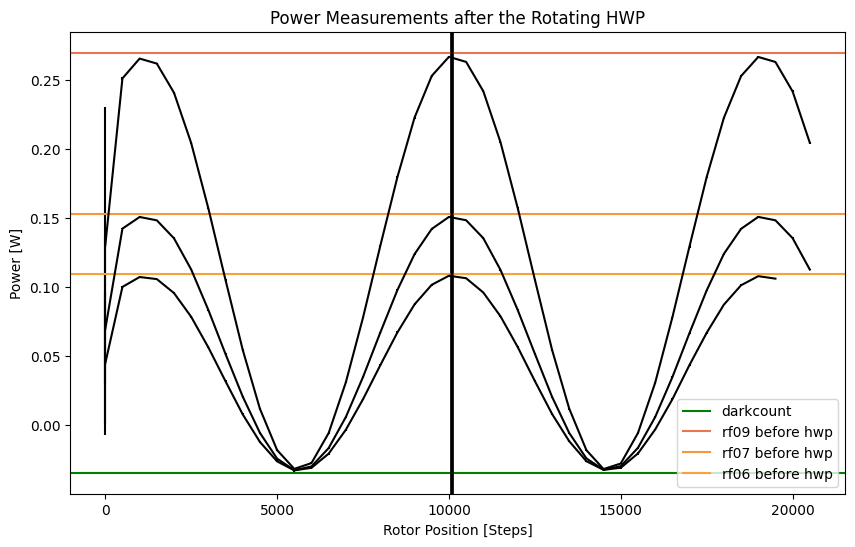

In [96]:
# plot all rfs tgt

fig, ax = plt.subplots(1,1, figsize =  (10,6))
ax.set_title('Power Measurements after the Rotating HWP')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Rotor Position [Steps]')

#darkcount line
ax.axhline(np.average(darkcounts['averaged']), color = 'green', label = 'darkcount')
#before hwp average

for i, data in enumerate(all_rf):
    x = np.zeros(len(data['rotor_step']), dtype=float)
    for j,step in enumerate(data['rotor_step']):
        lst = ast.literal_eval(step)
        array = np.array(lst, dtype=float)
        x[j] = array[0]
    rf = os.path.basename(csv_files[i+1]).split('rf')[1]
    # rf = os.path.basename(csv_files[i+1]).split('rf')[1]
    if (not '100' in rf):
        rf = rf[0:2]
        label = f'rf{rf}'
    else:
        rf = rf[0:3]
        label = f'rf{rf}'

    # if 'N48' in os.path.basename(csv_files[i+1]) or '03' in os.path.basename(csv_files[i+1]):
    # if (rf == '15') or (rf=='10'):
    if label == 'rf07' or label == 'rf06' or label == 'rf09'  :
    # if label == 'rf90'  :
        

        print(i, label)
        print('hello ! | ')
        y = data['averaged']
        error = np.array(data['stdev'])

        # params, params_covariance = curve_fit(sine_function, x[3:], y[3:], p0 = [0.0361029908,0.0998, 3.87, 0.0046])
        # plt.plot(x, sine_function(x, *params), label='Fitted Sine Function', color='red')
        # print(i, "Fitted Parameters: A = {}, B = {}, C = {}, D = {}".format(*params))
        try:
            ax.axhline(all_before_avg[label], color = colors[i], label = f'{label} before hwp')
        except KeyError:
            print(f'{label} isnt measured at before hwp')
        # ax.scatter(x, y, label=label, marker='x')
        # ax.plot(x, y, label=label, color = colors[i])
        ax.errorbar(x = x, y = y, yerr=error, fmt='-o', color = 'black', markersize = 0)
        # ax.errorbar(x = x, y = y, yerr=error, fmt='x', color = 'black', markersize = 1)
    ax.axvline(10000+100, color = 'black')
    

    # ax.set_ylim( -0.04, 0)

ax.legend()